In [ ]:
#%matplotlib notebook

In [1]:
#************************* MAIN SCRIPT **********************************

import sys
import math
import h5py
import matplotlib.pyplot as plt
import os
import math
from scipy import integrate
import numpy as np
import csv
#os.path.append('/Users/ajc/Core/Projects/ATS-Data/OR-CONDO/PyScript')
#import readdata

In [4]:
path ='/Users/ajc/FUSE/simulations/forcing_data/Barrow-Validation/Barrow-2010_2016-updated-smooth.h5'
path_wl_full = '/Users/ajc/NFS/simulations/barrow_icewedges/BCData/waterlevel-3D-wellC37-2012-2014.h5'
path_wl = '/Users/ajc/FUSE/simulations/forcing_data/Barrow-Anna/waterlevel-TransectBAreaC-wellC37-barrow2013.h5'
path_wl_2014 = '/Users/ajc/FUSE/simulations/forcing_data/Barrow-Anna/waterlevel-TransectBAreaC-wellC37-barrow2014.h5'

In [5]:
forcing = h5py.File(path,'r')
wt_full = h5py.File(path_wl_full,'r')
wt = h5py.File(path_wl,'r')
wt_2014 = h5py.File(path_wl_2014,'r')
#print (wt.keys(),wt_2014.keys())
#print (wt_full.keys())

In [6]:
r = int(len(forcing['precipitation rain [m s^-1]'])%365.)
s = 2*365
e = s + 3*365
rain1 = [r*86400*10 for r in forcing['precipitation rain [m s^-1]'][s:e]]
rain = np.reshape(rain1, (3,365))
rain_time1 = [r/86400. for r in forcing['time [s]'][s:e]]

temp1 = [r for r in forcing['air temperature [K]'][s:e]]
temp = np.reshape(temp1, (3,365))
temp_time1 = [r/86400. for r in forcing['time [s]'][s:e]]

#------------------- 2012 ----------------------------
water_table_2012 = [ (w-101325)/(1000*9.8) for w in wt_full['ponded depth C37 [m]), left']]
wt_time_2012 = [ 365*2*0 + t/86400 for t in wt_full['time [s]']]

time = np.reshape(rain_time1, (3,365))
water_table = [ (w-101325)/(1000*9.8) for w in wt['ponded depth (2013-C37) [m]']]
wt_time = [ 365*3 + t/86400 for t in wt['time (ponded depth) [s]']]

#------------------- 2014 ----------------------------
water_table_2014 = [ (w-101325)/(1000*9.8) for w in wt_2014['ponded depth (2014-C37) [m]']]
wt_time_2014 = [ 365*4 + t/86400 for t in wt_2014['time (ponded depth) [s]']]

print (wt_time[0], wt_time_2014[0])

1095.0 1460.0


In [12]:
#2012
#%matplotlib tk
color = ['k','r','g','m','c','y']
#print (rain[0][150:281]*100)
Rain_w2012 = rain[0][157:281]*100

interval2012 = np.where(Rain_w2012 > 2.5)[0]
#print (Rain_w2012, Rain_w2012[52])
temp_interval = np.where(temp[0] > 273.15)[0]
#print (temp_interval)
water2012 = []
#print (interval2012)
s = 0.2 - 0.01*(interval2012[1] - interval2012[0])/7

for i in range(interval2012[0]):
    drain1=s - 0.005*i
    if (drain1>0 or True):
        water2012.append(drain1)
    else:
        water2012.append(0)
#print (water2012,r2,s)
for i, val in enumerate(interval2012):
    r1 = water2012[-1] + (Rain_w2012[val]/1000)**0.75
    if water2012[-1] >0.1 and water2012[-1] <0.2:#heavy rain
        r1 = water2012[-1] + (Rain_w2012[val]/1000)**1.0
    if (val<interval2012[-1]):
        dI = interval2012[i+1] - interval2012[i]
    else:
        dI = len(Rain_w2012) - (interval2012[-1])
    D = []
    for k in range(dI):
        if i < 3:
            drain = r1 - k*0.005
        else:
            drain = r1 - k*0.002
        if drain > 0 :
            D.append(drain)
        else:
            D.append(0.0)
    water_2 = D
    for j in range(len(water_2)):
        water2012.append(water_2[j])
#print (len(water2012))

In [13]:
Rain_w2013 = rain[1][159:258]*100
#Rain_w2013 = cesm_rain[5][159:258]*1000*86400
#print (Rain_w2013)
interval2013 = np.where(Rain_w2013 > 2.5)[0]

temp_interval1 = np.where(temp[1] > 273.15)[0]

s = 0.2 - 0.01*(interval2013[1] - interval2013[0])/7
print (s)
water2013 = []
#print (temp_interval1)
print (interval2013)
#print (Rain_w2013)
for i in range(interval2013[0]):
    drain1=s - 0.005*i
    if (drain1>0):
        water2013.append(drain1)
    else:
        water2013.append(0)
for i, val in enumerate(interval2013):
    r1 = water2013[-1] + (Rain_w2013[val]/1000)**0.75
    if water2013[-1] >0.1 and water2013[-1] <0.2:#heavy rain
        r1 = water2013[-1] + (Rain_w2013[val]/1000)**1.0

    if (val<interval2013[-1]):
        dI = interval2013[i+1] - interval2013[i]
    else:
        dI = len(Rain_w2013) - (interval2013[-1])
    D = []
    for k in range(dI):
        if i < 3:
            drain = r1 - k*0.005
        else:
            drain = r1 - k*0.002
        if drain > 0 :
            D.append(drain)
        else:
            D.append(0.0)
    water_2 = D
    for j in range(len(water_2)):
        water2013.append(water_2[j])
   

0.19142857142857145
[ 1  7 25 45 49 50 52 55 56 57 63 90 96 97]


In [14]:
#2014
#%matplotlib tk
color = ['k','r','g','m','c','y']

Rain_w2014 = rain[2][160:274]*100
interval2014 = np.where(Rain_w2014 > 2.5)[0]

temp_interval = np.where(temp[2] > 273.15)[0]

water2014 = []

s = 0.2 - 0.01*(interval2014[1] - interval2014[0])/7

for i in range(interval2014[0]):
    drain1=s - 0.005*i
    if (drain1>0):
        water2014.append(drain1)
    else:
        water2014.append(0)
print (interval2014[0])
for i, val in enumerate(interval2014):
    r1 = water2014[-1] + (Rain_w2014[val]/1000)**0.75
    if water2014[-1] >0.1 and water2014[-1] <0.2:#heavy rain
        r1 = water2014[-1] + (Rain_w2014[val]/1000)**1.0
    if (val<interval2014[-1]):
        dI = interval2014[i+1] - interval2014[i]
    else:
        dI = len(Rain_w2014) - (interval2014[-1])
    D = []
    for k in range(dI):
        if i < 3:
            drain = r1 - k*0.005
        else:
            drain = r1 - k*0.002
        if drain > 0 :
            D.append(drain)
        else:
            D.append(0.0)
    water_2 = D
    for j in range(len(water_2)):
        water2014.append(water_2[j])
    

14


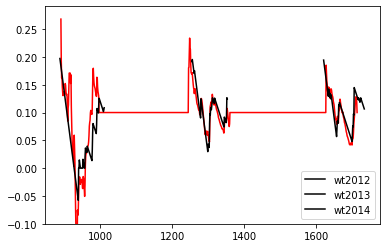

In [15]:
t_z = 0

#plt.plot(time[1],t_z+rain[1],color[2])
#plt.plot(time[2],rain[2],color[2])
plt.plot(wt_time_2012[1:],t_z+np.array(water_table_2012[1:]),'r')
#plt.plot(wt_time[1:],t_z+np.array(water_table[1:]),'r')
#plt.plot(wt_time_2014[1:],t_z+np.array(water_table_2014[1:]),'r')

plt.plot(time[0][157:281],t_z+np.array(water2012),'k-',label='wt2012')
plt.plot(time[1][159:258],t_z+np.array(water2013),'k-',label='wt2013')
plt.plot(time[2][160:274],t_z+np.array(water2014),'k-',label='wt2014')
plt.ylim(-0.1,)
plt.legend(loc='lower right')
plt.show()

In [ ]:
#rain[1]

In [ ]:
# projected water table 
cesm_data = h5py.File('/Users/ajc/FUSE/simulations/production/barrow_watershed/data/CESM/CESM-RCP8_5-2006-2100_snowadjusted_supersmoothDM_2006.h5','r')

In [ ]:
cesm_rain = np.reshape(cesm_data['precipitation rain [m s^-1]'],(-1,365))
cesm_temp = np.reshape(cesm_data['air temperature [K]'],(-1,365))

barrow_rain2013 = rain[1]*100
barrow_rain2014 = rain[2]*100
#[r*86400*1000 for r in forcing['precipitation rain [m s^-1]'][365*3:365*4]]

In [ ]:
plt.plot(cesm_rain[6]*1000*86400)
plt.plot(barrow_rain2014,'r.')